# Titanic Dataset Investigation

## Introduction
This Jupyter Notebook investigates the Titanic dataset provided by Kaggle. 

The objective of this investigation is to determine chances of survival of a passenger based on:
  * Age
  * Gender
  * Number of siblings and spouses aboard
  * Number of parents and children aboard
  
This investigation therefore answers the following question:
_"How likely a passenger would survive, based on age, gender, ticket class and number of siblings and spouses aboard and number of parents and children aboard"_

To begin with, the dataset is loaded into a Pandas Dataframe, and its first few records are viewed.

In [1]:
import csv
import pandas as pd
titanic_df = pd.read_csv('titanic.csv', quoting=csv.QUOTE_MINIMAL, skiprows=[0],
                         names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
                                'sib_sp', 'par_ch', 'ticket_id', 'fare', 'cabin', 'port'])
titanic_df.head()

,passenger_id,survived,class,name,sex,age,sib_sp,par_ch,ticket_id,fare,cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
To begin with, attributes that are not considered in the investigation (`passenger_id`, `name`, `titcket_id`, `fare`, `cabin` and `port`) can be removed from the dataset.

In [2]:
titanic_df = titanic_df.drop(['passenger_id', 'name', 'ticket_id', 'fare', 'cabin', 'port'], axis=1)
titanic_df.head()

,survived,class,sex,age,sib_sp,par_ch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Next, to ensure that the dataset is ready for analysis, check whether any attributes have missing values.

In [3]:
titanic_df['survived'].isnull().sum()

0

In [4]:
titanic_df['age'].isnull().sum()

177

In [5]:
titanic_df['sex'].isnull().sum()

0

In [6]:
titanic_df['sib_sp'].isnull().sum()

0

In [7]:
titanic_df['par_ch'].isnull().sum()

0

The `age` attribute seems to have missing values; `177` to be exact. These missing values could be ignored during the analysis.

In [8]:
titanic_df = titanic_df[titanic_df['age'].notnull()]
titanic_df['age'].isnull().sum()

0

## Survivors
The dataset provides details of passengers aboard Titanic, and wether or not they survived. Objective of this investigation is to determine chances of survival of a passenger based on their age, sex, class, number of siblings and parents aboard. Survivors are identified using `survived` attribute with values `0` and `1`, representing non survivors and survivors respectively.

### Survival based on Age

In [9]:
survivors = titanic_df.groupby('survived')['age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


/home/aliasm2k/Public/.virtualenv/titanic/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


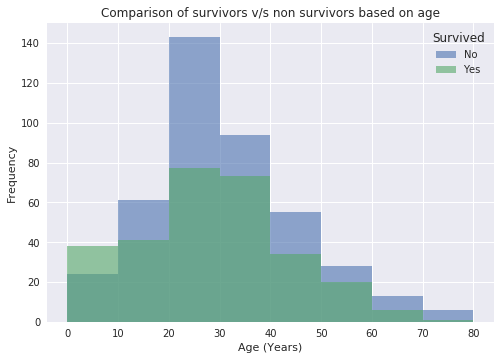

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax1, ax2 = survivors.plot(kind='hist', legend=True, alpha=0.6, bins=range(0, 90, 10))
ax1.set_xlabel('Age (Years)')
ax1.legend(['No', 'Yes'], title='Survived', loc='upper right')
ax2.set_ylabel('Frequency')
plt.title('Comparison of survivors v/s non survivors based on age')

From the results it can be concluded that age is not a determining factor for survival as the shape of the histogram is almost the same for both survivors and non survivors with the exception of children.

### Survival based on Gender

In [11]:
survivors = titanic_df.groupby('survived')['sex']
survivors.describe()

,count,unique,top,freq
survived,,,,
0,424,2,male,360
1,290,2,female,197


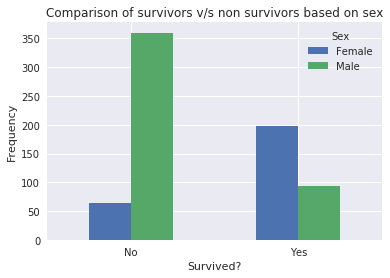

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors = pd.crosstab(titanic_df['survived'], titanic_df['sex'])
survivors.plot(kind='bar', legend=True)
plt.xlabel('Survived?')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Frequency')
plt.legend(['Female', 'Male'], title='Sex', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on sex')

From the results, it can be concluded that more females survived than males.

### Survival based on Ticket Class

In [13]:
survivors = titanic_df.groupby('survived')['class']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,2.485849,0.743633,1.0,2.0,3.0,3.0,3.0
1,290.0,1.872414,0.836617,1.0,1.0,2.0,3.0,3.0


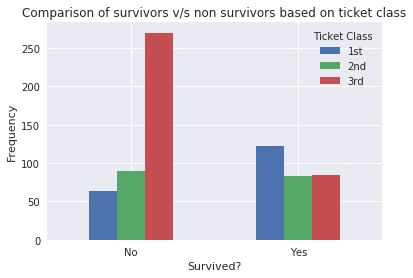

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors = pd.crosstab(titanic_df['survived'], titanic_df['class'])
survivors.plot(kind='bar')
plt.xlabel('Survived?')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Frequency')
plt.legend(['1st', '2nd', '3rd'], title='Ticket Class', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on ticket class')

From the results, it can be concluded that first and second class passengers had higher chances of survival than third class passengers.

### Survival based on Siblings and Spouses aboard

In [15]:
survivors = titanic_df.groupby('survived')['sib_sp']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,0.525943,1.044760,0.0,0.0,0.0,1.0,5.0
1,290.0,0.493103,0.731132,0.0,0.0,0.0,1.0,4.0


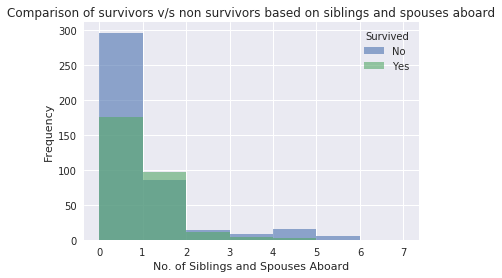

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax1, ax2 = survivors.plot(kind='hist', bins=range(0, 8, 1), legend=True, alpha=0.6)
ax1.set_xlabel('No. of Siblings and Spouses Aboard')
ax1.legend(['No', 'Yes'], title='Survived', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on siblings and spouses aboard')

From the results it can be concluded that having siblings and spouses aboard is not a factor determining survival of a passenger.

### Survival based on Parents and Children aboard

In [17]:
survivors = titanic_df.groupby('survived')['par_ch']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,0.365566,0.878341,0.0,0.0,0.0,0.0,6.0
1,290.0,0.527586,0.807147,0.0,0.0,0.0,1.0,5.0


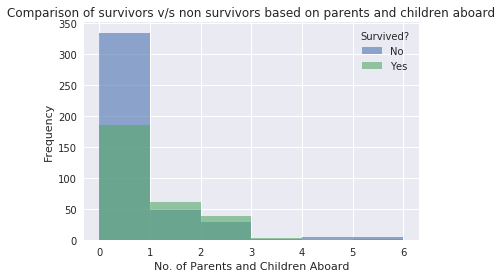

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

ax1, ax2 = survivors.plot(kind='hist', legend=True, bins=range(0, 7, 1), alpha=0.6)
ax1.set_xlabel('No. of Parents and Children Aboard')
ax1.legend(['No', 'Yes'], title='Survived?', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on parents and children aboard')

From the results, it can be concluded that having parents and children aboard is not a factor determining survival of a passenger.

## Limitations
The main limitation of this dataset investigation is its missing values.

## Conclusion
From the analysis, it can be concluded that factors determining a passengers survival are:
  * Ticket class of the passenger
  * Gender of the passenger

Factors that doesn't determine a passengers survival are:
  * Siblings and spouses aboard with the passenger
  * Parents and children aboard with the passenger
  * Age of the passenger